# 導入套件

### [中選會 資料下載](https://vote2024.cec.gov.tw/zh-TW/indexP0.html)

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # 中文輸出(台北黑體)

In [2]:
# Presient2024
# Presient2024.to_pickle('./Presient2024.pkl')
Presient2024 = pd.read_pickle('./Presient2024.pkl')

In [3]:
City_lst = ['臺北市', '新北市', '臺中市', '臺南市', '高雄市', '基隆市', '桃園市', '新竹市', '新竹縣', '苗栗縣', '南投縣', '彰化縣', '雲林縣', '嘉義市', '嘉義縣', '屏東縣',  '宜蘭縣', '花蓮縣', '臺東縣', '澎湖縣', '連江縣', '金門縣']
presient24 = Presient2024.iloc[:, 1:4].groupby('City').sum().loc[City_lst].copy()
presient24.columns = ['柯盈', '賴蕭', '侯康']
c_lst = ['#28C8C8', '#1B9431', '#000095'] # 色碼

display(presient24)

,柯盈,賴蕭,侯康
City,,,
臺北市,366854,587899,587258
新北市,645105,948818,864557
臺中市,513025,641622,552556
臺南市,262560,570811,286867
高雄市,358096,800390,478476
基隆市,58195,76079,84507
桃園市,413528,476441,460823
新竹市,91384,92679,82326
新竹縣,120985,93309,126016


In [4]:
arr = presient24.values.T
arr = arr / arr.sum(0) * 100
arr.shape

(3, 22)

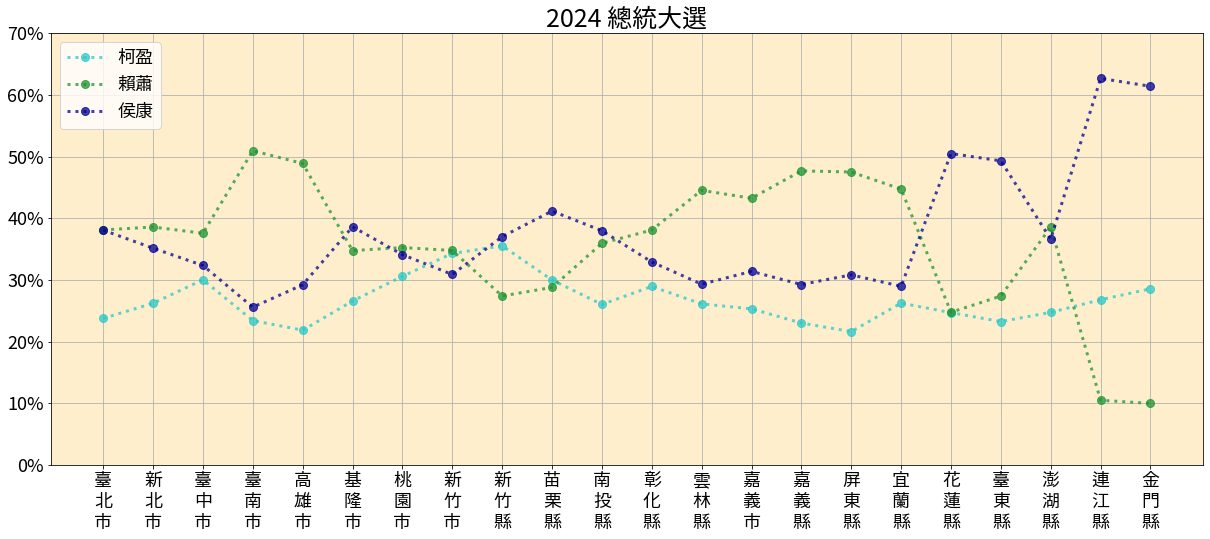

In [5]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(3):
    ax.plot(arr[i], 'o:', c=c_lst[i], ms=8, lw=3, alpha=0.75, label=presient24.columns[i])
    
xticks = list(presient24.index.str[-3]  + '\n' + presient24.index.str[-2] + '\n' + presient24.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 71, 10), [str(s)+'%' for s in range(0, 71, 10)], fontsize=18)
plt.ylim([0, 70])
plt.title('2024 總統大選', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)

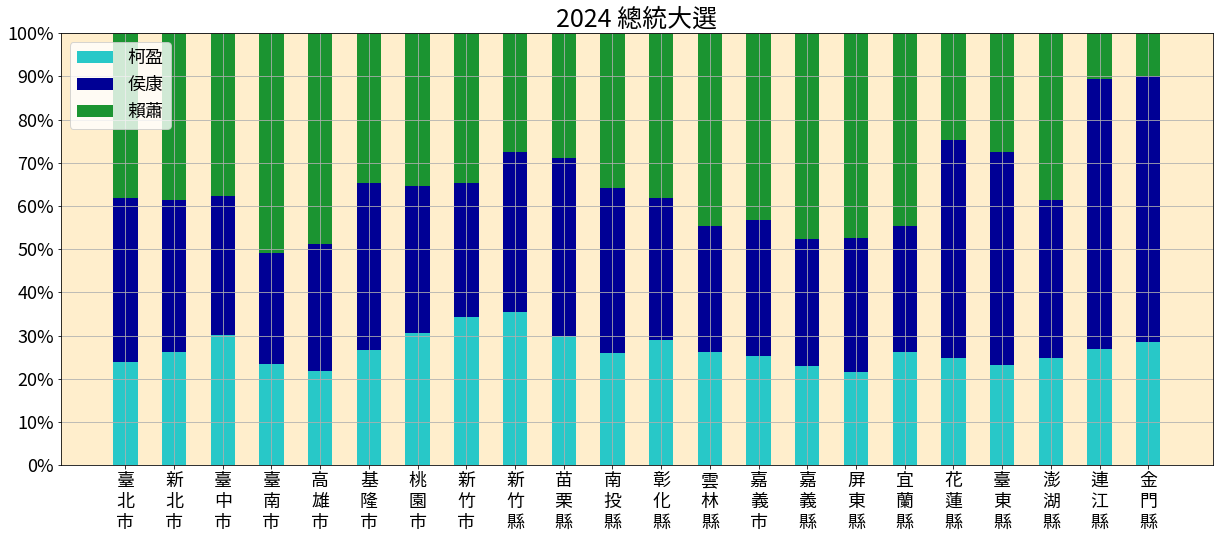

In [6]:
sort = [0, 2, 1] # 重新排列政黨
arrsort = arr[sort]

fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(3):
    ax.bar(np.arange(22), arr[sort[i]], 0.5,  yerr=np.zeros(22), color=c_lst[sort[i]],  bottom=arrsort[0:i, :].sum(0), label=presient24.columns[sort[i]])
 
xticks = list(presient24.index.str[-3]  + '\n' + presient24.index.str[-2] + '\n' + presient24.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 101, 10), [str(s)+'%' for s in range(0, 101, 10)], fontsize=18)
plt.ylim([0, 100])
plt.title('2024 總統大選', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)

# 地圖

In [7]:
tw_map = gp.read_file('map/TOWN_MOI_1120825.shp')[['COUNTYNAME', 'TOWNNAME', 'geometry']]
tw_map['Area'] = tw_map.COUNTYNAME.str[:] + tw_map.TOWNNAME.str[:]
tw_map

,COUNTYNAME,TOWNNAME,geometry,Area
0,臺東縣,成功鎮,"POLYGON ((121.40981 23.21370, 121.40984 23.213...",臺東縣成功鎮
1,屏東縣,佳冬鄉,"POLYGON ((120.54845 22.46067, 120.54853 22.460...",屏東縣佳冬鄉
2,雲林縣,麥寮鄉,"POLYGON ((120.30198 23.81624, 120.30198 23.815...",雲林縣麥寮鄉
3,臺東縣,綠島鄉,"MULTIPOLYGON (((121.49154 22.67746, 121.49184 ...",臺東縣綠島鄉
4,臺東縣,蘭嶼鄉,"MULTIPOLYGON (((121.61179 21.94290, 121.61133 ...",臺東縣蘭嶼鄉
...,...,...,...,...
363,花蓮縣,萬榮鄉,"POLYGON ((121.27481 23.92640, 121.27521 23.926...",花蓮縣萬榮鄉
364,桃園市,龍潭區,"POLYGON ((121.19257 24.89410, 121.19262 24.894...",桃園市龍潭區
365,桃園市,平鎮區,"POLYGON ((121.19052 24.97122, 121.19059 24.971...",桃園市平鎮區
366,臺北市,南港區,"POLYGON ((121.61426 25.06451, 121.61426 25.064...",臺北市南港區


In [8]:
presient_town = Presient2024.iloc[:, 1:4].groupby(['City', 'Town']).sum().reset_index()
presient_town['Area'] = presient_town.City.str[:] + presient_town.Town.str[1:]
presient_town

,City,Town,1,2,3,Area
0,南投縣,中寮鄉,1965,3300,3127,南投縣中寮鄉
1,南投縣,仁愛鄉,1903,1009,4756,南投縣仁愛鄉
2,南投縣,信義鄉,2004,2018,4017,南投縣信義鄉
3,南投縣,南投市,16078,20878,22512,南投縣南投市
4,南投縣,名間鄉,5647,9914,6881,南投縣名間鄉
...,...,...,...,...,...,...
363,高雄市,阿蓮區,3414,9111,3825,高雄市阿蓮區
364,高雄市,鳥松區,5758,14360,8222,高雄市鳥松區
365,高雄市,鳳山區,48651,98990,65076,高雄市鳳山區
366,高雄市,鹽埕區,2573,7835,4091,高雄市鹽埕區


In [12]:
layout = pd.merge(presient_town, tw_map, how='outer')
layout

,City,Town,1,2,3,Area,COUNTYNAME,TOWNNAME,geometry
0,南投縣,中寮鄉,1965,3300,3127,南投縣中寮鄉,南投縣,中寮鄉,"POLYGON ((120.83477 23.97048, 120.83476 23.970..."
1,南投縣,仁愛鄉,1903,1009,4756,南投縣仁愛鄉,南投縣,仁愛鄉,"POLYGON ((121.34302 24.22355, 121.34302 24.223..."
2,南投縣,信義鄉,2004,2018,4017,南投縣信義鄉,南投縣,信義鄉,"POLYGON ((121.23491 23.81811, 121.23487 23.818..."
3,南投縣,南投市,16078,20878,22512,南投縣南投市,南投縣,南投市,"POLYGON ((120.73447 23.94926, 120.73413 23.949..."
4,南投縣,名間鄉,5647,9914,6881,南投縣名間鄉,南投縣,名間鄉,"POLYGON ((120.72751 23.88085, 120.72749 23.880..."
...,...,...,...,...,...,...,...,...,...
363,高雄市,阿蓮區,3414,9111,3825,高雄市阿蓮區,高雄市,阿蓮區,"POLYGON ((120.31648 22.89844, 120.31668 22.898..."
364,高雄市,鳥松區,5758,14360,8222,高雄市鳥松區,高雄市,鳥松區,"POLYGON ((120.39245 22.69474, 120.39243 22.694..."
365,高雄市,鳳山區,48651,98990,65076,高雄市鳳山區,高雄市,鳳山區,"POLYGON ((120.37780 22.63771, 120.37783 22.637..."
366,高雄市,鹽埕區,2573,7835,4091,高雄市鹽埕區,高雄市,鹽埕區,"POLYGON ((120.28596 22.63174, 120.28598 22.631..."


In [14]:
def color_code2cmp(code):
    r = int('0x'+code[1:3], 16)
    g = int('0x'+code[3:5], 16)
    b = int('0x'+code[5:], 16)
    
    vals = np.ones((256, 4))
    vals[:, 0] = np.linspace(1, r/256, 256)
    vals[:, 1] = np.linspace(1, g/256, 256)
    vals[:, 2] = np.linspace(1, b/256, 256)
    
    return matplotlib.colors.ListedColormap(vals)

AttributeError: 'Line2D' object has no property 'fc'

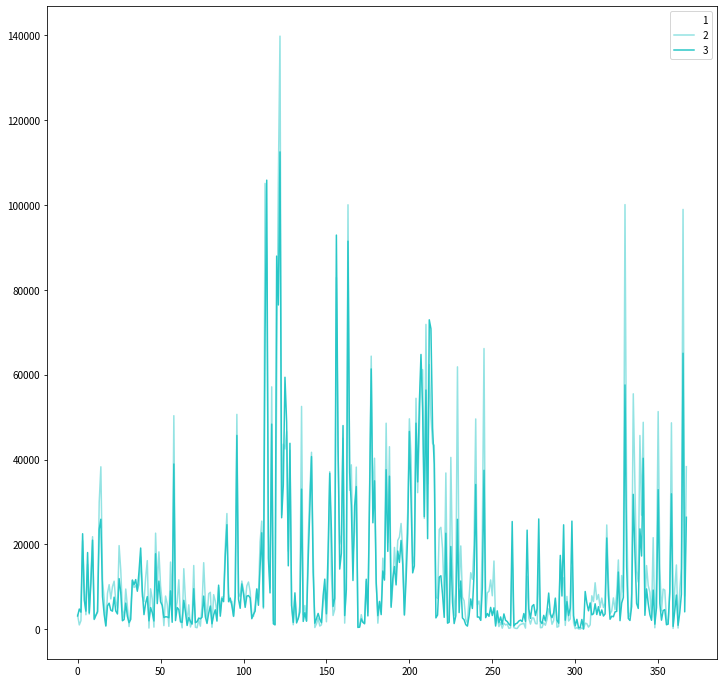

In [19]:
cmp = color_code2cmp(c_lst[0])
base = layout.plot(figsize=(12, 12), column='AAA', cmap=cmp)
layout.plot(ax=base, fc='', edgecolor='#808080', rasterized=True, lw=0.9)
# tw2.plot(ax=base, fc='', edgecolor='#a0a0a0', rasterized=True, lw=0.3)
plt.title('AAA', fontsize=20)

d = 4
x = 118.9
plt.xlim(x, x+d)
y = 21.6
plt.ylim(y, y+d)
plt.xticks([], [])
plt.yticks([], [])
plt.box(0)
plt.show()

# 2020

In [7]:
presient20 = pd.read_pickle('./Presient2020.pkl').loc[City_lst]
c_lst = ['#ff6310', '#000095', '#1b9431'] # 色碼

display(presient20)

,宋,韓,蔡
City,,,
臺北市,70769,685830,875854
新北市,112620,959631,1393936
臺中市,84800,646366,967304
臺南市,41075,339702,786471
高雄市,55309,610896,1097621
基隆市,11878,99360,114966
桃園市,63132,529749,718260
新竹市,14103,102725,144274
新竹縣,18435,154224,152380


In [8]:
arr = presient20.values.T
arr = arr / arr.sum(0) * 100

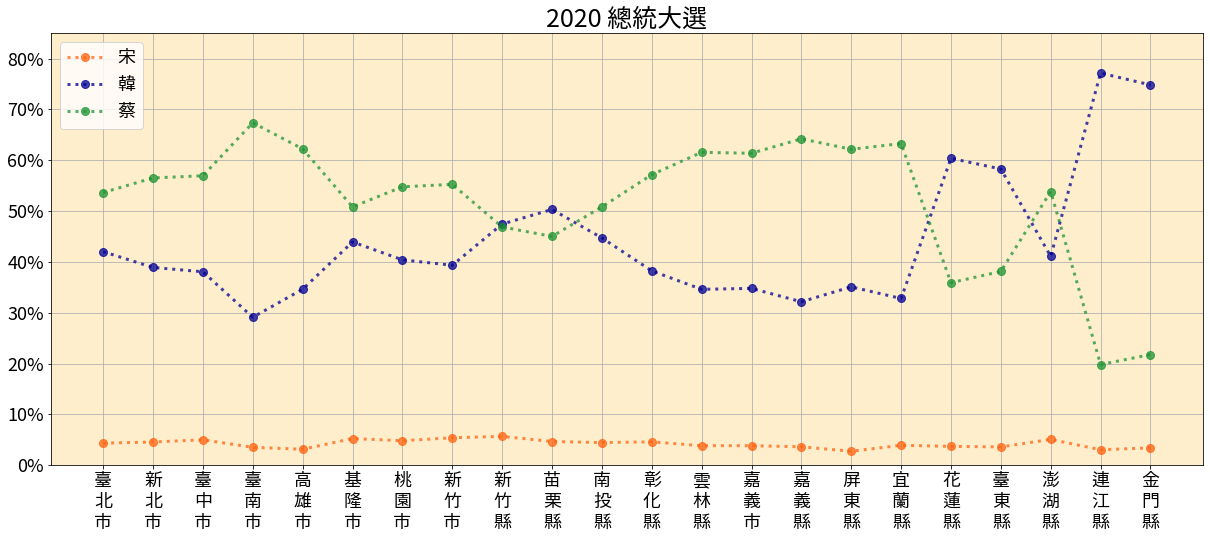

In [9]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(3):
    ax.plot(arr[i], 'o:', c=c_lst[i], ms=8, lw=3, alpha=0.75, label=presient20.columns[i])
    
xticks = list(presient20.index.str[-3]  + '\n' + presient20.index.str[-2] + '\n' + presient20.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 81, 10), [str(s)+'%' for s in range(0, 81, 10)], fontsize=18)
plt.ylim([0, 85])
plt.title('2020 總統大選', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)

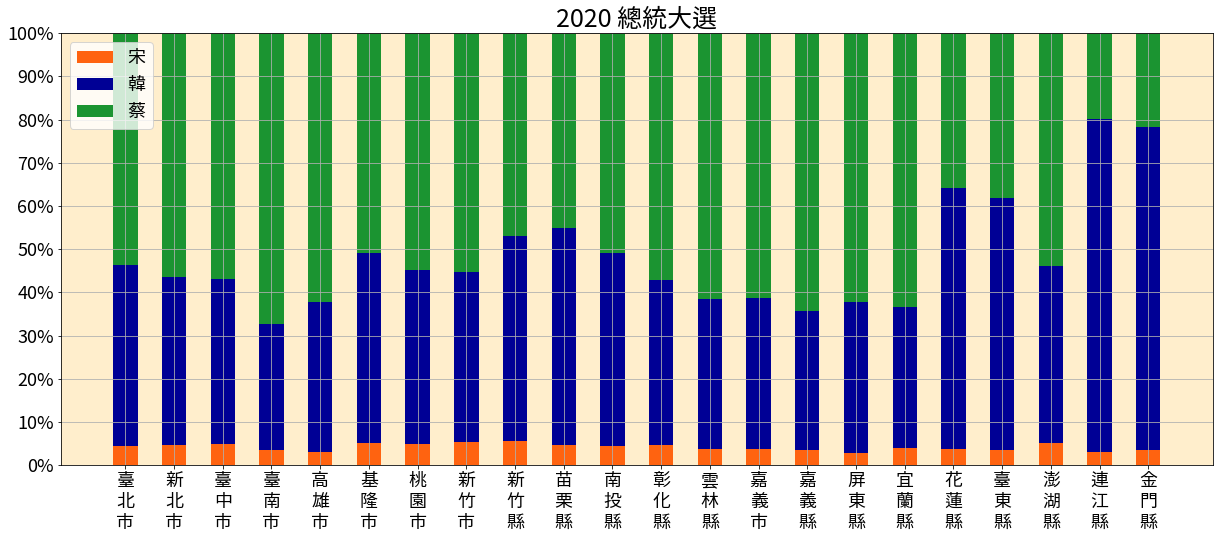

In [10]:
sort = [0, 1, 2] # 重新排列政黨
arrsort = arr[sort]

fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(3):
    ax.bar(np.arange(22), arr[sort[i]], 0.5,  yerr=np.zeros(22), color=c_lst[sort[i]],  bottom=arrsort[0:i, :].sum(0), label=presient20.columns[sort[i]])
 
xticks = list(presient20.index.str[-3]  + '\n' + presient20.index.str[-2] + '\n' + presient20.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 101, 10), [str(s)+'%' for s in range(0, 101, 10)], fontsize=18)
plt.ylim([0, 100])
plt.title('2020 總統大選', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)